# Name: PREETHA S
# Live Facial Detection with Open CV.

In [4]:
#IMPORTING OPENCV
import cv2

#Storing the path of the image in a variable
imagePath = 'AI generated face.jpeg'

In [5]:
#Reading the image
img = cv2.imread(imagePath)

In [6]:
#Checking the dimensions of the image array
img.shape

(351, 351, 3)

In [7]:
#Converting the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
#Checking the dimensions of the grayscale image array
gray_image.shape

(351, 351)

### LOADING THE CLASSIFIER

In [9]:
#Loading the pre-trained Haar Cascade classifier that is built into OpenCV
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [10]:
#Performing face detection
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [11]:
#Drawing the bounding box
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)    #(0, 255, 0) is the color of the box     4 is the thickness

In [12]:
#Changing the image format from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 350.5, 350.5, -0.5)

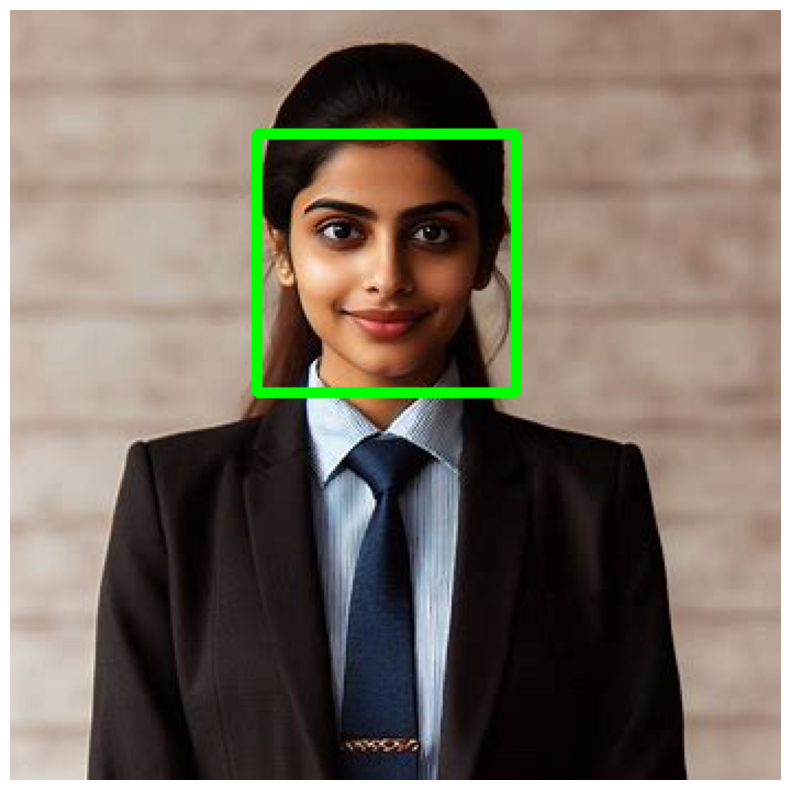

In [13]:
#Displaying the image using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [14]:
#Accessing the webcam
#cap = video_capture = cv2.VideoCapture(0)     #0 means to use default webcam in your device
#print(cap.isOpened())

In [18]:
#Accessing the webcam
video_capture = cv2.VideoCapture(0)     #0 means to use default webcam in our device

In [19]:
#Detecting face and drawing a bounding box from the video

def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [20]:
#Create an indefinite while loop that will capture the video frame from our webcam and apply the face detection function to it.

while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  #terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  #apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  #display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"): #PRESS 'Q' TO CLOSE THE CAMERA FEED
        break

video_capture.release()
cv2.destroyAllWindows() 